In [2]:
# Imports

import os
import json
import numpy as np
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Bidirectional, Dropout, Dense, Flatten, Reshape
from sklearn import metrics
import matplotlib.pyplot as plt

## Read JSON Files & Create a single Numpy array

In [3]:
def load_data(split_path):
    X = []
    Y = []
    
    seqs_list=os.listdir(split_path)
    random.shuffle(seqs_list)

    for seq in seqs_list:
        seq_file_path=os.path.join(split_path,seq)
        with open(seq_file_path, "r") as f:
            data = json.load(f)
            X.append(data['features'])
            Y.append(data['class'])

    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y


In [4]:
# Change these paths to the ones generated by the notebook I send on whatsapp
split_train_path= r"C:\Users\Ivan Lopez\Desktop\GDP\split_seqs\run1_a+p_dist_1_0.5\train"
split_test_path= r"C:\Users\Ivan Lopez\Desktop\GDP\split_seqs\run1_a+p_dist_1_0.5\test"

# Train data

X_train, y_train = load_data(split_train_path)
num_json,num_frame,num_features = X_train.shape 

# Test data
X_test, y_test = load_data(split_test_path)
num_json_test = X_test.shape[0]

In [11]:
print(X_train.shape)

(8075, 10, 24)


## 1. Data Preprocessing

In [12]:
num_classes = 3
Y_train_cat=to_categorical(y_train,num_classes)
Y_test_cat=to_categorical(y_test,num_classes)
print(Y_train_cat.shape)

(8075, 3)


## 2. Build model 3 categories

In [13]:
# As you can see, it is a very simple model: but already achieving:
# 0.78 accuracy in training
# 0.75 accuracy in test

# Define model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(num_frame,num_features)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 64)            22784     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                

## 3.Training

In [14]:
# Train the model with validation split of 0.2
history = model.fit(X_train, Y_train_cat, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
202/202 [==============================] - 2s 10ms/step - loss: 0.7862 - accuracy: 0.6731 - val_loss: 0.7297 - val_accuracy: 0.6954
Epoch 2/10
202/202 [==============================] - 1s 7ms/step - loss: 0.7273 - accuracy: 0.7065 - val_loss: 0.6963 - val_accuracy: 0.7201
Epoch 3/10
202/202 [==============================] - 1s 7ms/step - loss: 0.7010 - accuracy: 0.7201 - val_loss: 0.6811 - val_accuracy: 0.7294
Epoch 4/10
202/202 [==============================] - 1s 7ms/step - loss: 0.6695 - accuracy: 0.7282 - val_loss: 0.6582 - val_accuracy: 0.7412
Epoch 5/10
202/202 [==============================] - 2s 8ms/step - loss: 0.6617 - accuracy: 0.7427 - val_loss: 0.6586 - val_accuracy: 0.7393
Epoch 6/10
202/202 [==============================] - 1s 7ms/step - loss: 0.6331 - accuracy: 0.7565 - val_loss: 0.6439 - val_accuracy: 0.7492
Epoch 7/10
202/202 [==============================] - 1s 7ms/step - loss: 0.6146 - accuracy: 0.7636 - val_loss: 0.6209 - val_accuracy: 0.7635
Epoch

## 4. Make predictions and confusion matrix

Test accuracy:  0.7563150074294205


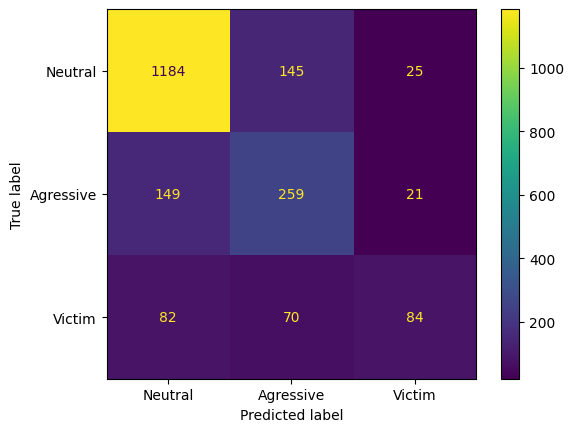

In [17]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = y_pred.argmax(axis=-1)

# Compute test accuracy
correct=0
for i in range(len(y_pred_classes)):
    if y_pred_classes[i]==y_test[i]:
        correct+=1
test_accuracy=correct/len(y_pred_classes)
print("Test accuracy: ",test_accuracy)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Neutral", "Agressive","Victim"])
cm_display.plot()
plt.show()

